In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas
!pip install librosa
!pip install plotly
!pip install matplotlib
!pip install mutagen
!pip install pillow
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import time
import librosa
import zipfile
import mutagen
import mutagen.wave
import numpy as np
import pandas as pd
import librosa.display
import IPython.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from PIL import Image

In [5]:
import glob
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Data Processing

In [ ]:
big_path_tr = '/content/drive/MyDrive/빅프/응급상황/Training'
big_path_val = '/content/drive/MyDrive/빅프/응급상황/Validation'

In [ ]:
# 폴더를 생성하고 unzip 함수 정의
def create_folder_and_unzip(file_path, destination_folder):
    # 폴더 생성
    os.makedirs(destination_folder, exist_ok=True)

    # unzip
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)

# unzip할 파일 경로와 목적지 경로를 변수로 받아옴
'''
for file in os.listdir(big_path_val):
        file_path = str(os.path.join(big_path_val, file))
        destination_folder = str(os.path.join(big_path_val, file[:-4]))

        # 폴더 생성 및 unzip 함수 호출
        create_folder_and_unzip(file_path, destination_folder)
'''

In [ ]:
#filename, path, class 가 포함된 df 만들기

In [ ]:
classID = []
file_path = []
slice_file_name = []
length=[]
class_name=[]

In [ ]:
path_folder = big_path_val
file_list_1 = os.listdir(path_folder)
#class별 폴더
for name_1 in file_list_1:
    class_path = os.path.join(path_folder, name_1)
    print(name_1, class_path, len(os.listdir(os.path.join(path_folder, name_1))))
    #폴더 내 파일
    file_list_2 = os.listdir(class_path)
    for name in file_list_2:
        print(name)
        print('classid, ', name.split('.')[0])
        print('filepath,', os.path.join(class_path, name))
        print('name', name.split('.')[1].split('_')[0])
        break
    break


[원천]15.실내_1 /content/drive/MyDrive/빅프/응급상황/Validation/[원천]15.실내_1 2865
15.실내_658711_label.wav
classid,  15
filepath, /content/drive/MyDrive/빅프/응급상황/Validation/[원천]15.실내_1/15.실내_658711_label.wav
name 실내


In [ ]:
len(os.listdir('/content/drive/MyDrive/빅프/응급상황/Validation/[원천]9.가스사고_1'))

5289

In [ ]:
def make_class_num(path_folder):
    file_path = []
    length_list =[]
    #validation 폴더
    file_list_1 = os.listdir(path_folder)
    #class별 폴더
    for name_1 in file_list_1:
        print(name_1)
        class_path = os.path.join(path_folder, name_1)
        #폴더 내 파일
        file_list_2 = os.listdir(class_path)
        for name in file_list_2:
            #classID
            # classID.append(name.split('.')[0])
            #path
            file_path.append(os.path.join(class_path, name))
            #file name
            # slice_file_name.append(name)
            #len
            audio_file, sample_rate = librosa.load(os.path.join(class_path, name))
            length_list.append(librosa.get_duration(y=audio_file, sr=sample_rate))
            #class
            # class_name.append(name.split('.')[1].split('_')[0])

def make_class_small(path_folder):
    class_path = path_folder
    #폴더 내 파일
    file_list_2 = os.listdir(class_path)
    for name in file_list_2:
        #classID
        classID.append(name.split('.')[0])
        #path
        file_path.append(os.path.join(class_path, name))
        #file name
        slice_file_name.append(name)
        #len
        # audio_file, sample_rate = librosa.load(os.path.join(class_path, name))
        # length.append(librosa.get_duration(y=audio_file, sr=sample_rate))
        #class
        class_name.append(name.split('.')[1].split('_')[0])


In [12]:
from pydub import AudioSegment
from concurrent.futures import ProcessPoolExecutor

def get_audio_length(file_path):
    audio = AudioSegment.from_file(file_path)
    return len(audio) / 1000  # 길이를 초 단위로 변환

def process_file(file_path):
    audio_length = get_audio_length(file_path)
    return {"File Path": file_path, "Audio Length (s)": audio_length}

def save_audio_info_to_dataframe(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        print(root)
        for name in files:
            file_path = os.path.join(root, name)
            file_paths.append(file_path)
    print("check1")
    data = []
    with ProcessPoolExecutor() as executor:
        results = executor.map(process_file, file_paths)
        print('check2')
        for result in results:
            data.append(result)

    df = pd.DataFrame(data)
    return df

# 데이터프레임에 저장할 오디오 파일이 있는 디렉토리를 지정합니다.
df = save_audio_info_to_dataframe(big_path_val)

# 결과 출력
print(df.tail())


/content/drive/MyDrive/빅프/응급상황/Validation
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]15.실내_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]1.강제추행(성범죄)_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]10.낙상_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]2.강도범죄_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]14.도움요청_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]6.갇힘_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]3.절도범죄_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]4.폭력범죄_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]5.화재_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]8.전기사고_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]11.붕괴사고_1
/content/drive/MyDrive/빅프/응급상황/Validation/[원천]7.응급의료_1
/content/drive/MyDrive/빅프/응급상황

In [13]:
df.tail()

,File Path,Audio Length (s)
50712,/content/drive/MyDrive/빅프/응급상황/Vali...,5.727
50713,/content/drive/MyDrive/빅프/응급상황/Vali...,8.550
50714,/content/drive/MyDrive/빅프/응급상황/Vali...,13.105
50715,/content/drive/MyDrive/빅프/응급상황/Vali...,15.404
50716,/content/drive/MyDrive/빅프/응급상황/Vali...,9.570


In [14]:
df.rename(columns = {'File Path':'file_path','Audio Length (s)':'audio_length'},inplace=True)
df


,file_path,audio_length
0,/content/drive/MyDrive/빅프/응급상황/Vali...,30.000
1,/content/drive/MyDrive/빅프/응급상황/Vali...,33.858
2,/content/drive/MyDrive/빅프/응급상황/Vali...,44.000
3,/content/drive/MyDrive/빅프/응급상황/Vali...,21.632
4,/content/drive/MyDrive/빅프/응급상황/Vali...,38.397
...,...,...
50712,/content/drive/MyDrive/빅프/응급상황/Vali...,5.727
50713,/content/drive/MyDrive/빅프/응급상황/Vali...,8.550
50714,/content/drive/MyDrive/빅프/응급상황/Vali...,13.105
50715,/content/drive/MyDrive/빅프/응급상황/Vali...,15.404


In [ ]:
#파일 이름 리스트
make_class_num(big_path_val)

In [ ]:
#dataset_df 에서 16번 class 삭제 후 다시 추가 필요
copy_dataset_df = dataset_df.copy()
copy_dataset_df.drop(copy_dataset_df[copy_dataset_df['classID']=='16'].index, inplace=True)
copy_dataset_df.groupby('classID').slice_file_name.count()

classID
1      757
10    1020
11    3485
14    1059
15    2865
2     3383
3     2012
4     4538
5     5603
6     1354
7     9620
8     8600
Name: slice_file_name, dtype: int64

In [ ]:
# s_df = pd.DataFrame({'classID': classID,'class':class_name,'slice_file_name':slice_file_name, 'file_path':file_path})
result_1 = pd.concat([copy_dataset_df,s_df], ignore_index=True)
result_1.tail()

,classID,class,slice_file_name,file_path
50712,9,가스사고,9.가스사고_705716_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
50713,9,가스사고,9.가스사고_706665_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
50714,9,가스사고,9.가스사고_683185_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
50715,9,가스사고,9.가스사고_697788_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
50716,9,가스사고,9.가스사고_697108_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...


In [17]:
#result_1과 length df 합치기 temp_df(audio_df)
temp_df = pd.merge(left = result_1 , right = df, how = "inner", on = "file_path")
temp_df.tail()

,classID,class,slice_file_name,file_path,audio_length
50712,9,가스사고,9.가스사고_705716_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,5.727
50713,9,가스사고,9.가스사고_706665_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,8.550
50714,9,가스사고,9.가스사고_683185_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,13.105
50715,9,가스사고,9.가스사고_697788_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,15.404
50716,9,가스사고,9.가스사고_697108_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,9.570


In [18]:
temp_df.describe()

,audio_length
count,50717.000000
mean,7.585805
std,11.201336
min,0.430000
25%,2.780000
50%,3.400000
75%,6.235000
max,301.070000


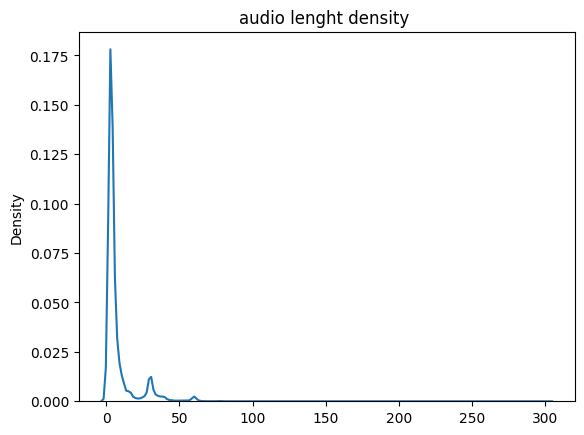

In [34]:
x = audio_df.audio_length.values

sns.kdeplot(x)
plt.title("audio lenght density ")
plt.show()

In [19]:
temp_df.groupby('classID').slice_file_name.count()

classID
1      757
10    1020
11    3485
14    1059
15    2865
16    1132
2     3383
3     2012
4     4538
5     5603
6     1354
7     9620
8     8600
9     5289
Name: slice_file_name, dtype: int64

In [ ]:
# dataset_df = pd.DataFrame({'classID': classID,'class':class_name, 'len':length, 'slice_file_name':slice_file_name, 'file_path':file_path})
dataset_df = pd.DataFrame({'classID': classID,'class':class_name,'slice_file_name':slice_file_name, 'file_path':file_path})

dataset_df.head()

,classID,class,slice_file_name,file_path
0,15,실내,15.실내_658711_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
1,15,실내,15.실내_912833_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
2,15,실내,15.실내_897487_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
3,15,실내,15.실내_670307_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...
4,15,실내,15.실내_697918_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...


In [ ]:
#class 9, 16누락됨
dataset_df.groupby('classID').slice_file_name.count()

In [20]:
# dataset_df.to_pickle("/content/drive/MyDrive/KT_aivle/bigproject/dataset_df.pkl")
# dataset_df = pd.read_pickle("/content/drive/MyDrive/KT_aivle/bigproject/dataset_df.pkl")

# result_1.to_pickle("/content/drive/MyDrive/KT_aivle/bigproject/result_1.pkl")
# result_1 = pd.read_pickle("/content/drive/MyDrive/KT_aivle/bigproject/result_1.pkl")

temp_df.to_pickle("/content/drive/MyDrive/KT_aivle/bigproject/audio_df.pkl")
audio_df = pd.read_pickle("/content/drive/MyDrive/KT_aivle/bigproject/audio_df.pkl")

In [22]:
audio_df.groupby('classID').slice_file_name.count()

classID
1      757
10    1020
11    3485
14    1059
15    2865
16    1132
2     3383
3     2012
4     4538
5     5603
6     1354
7     9620
8     8600
9     5289
Name: slice_file_name, dtype: int64

In [ ]:
#실제 validation data 개수
real_val_num = {'1': 757,'2':3383 ,'3': 2012,'4': 4538,'5': 5603,'6': 1354,'7': 9620,'8': 8600,'9': 5289,'10': 1020,'11': 3485,'14': 1059,'15': 2865,'16': 1132}

In [ ]:
#validation set 전체 개수
summ=0
for key in real_val_num.keys():
    summ+=real_val_num[key]
print(summ)


50717


### DataFrame으로 데이터 시각화

In [23]:
# Listen to the recordings (index can be changed to listen to a different recording)
index = 0
print('Listen to {} sample'.format(audio_df['file_path'][index]))
IPython.display.Audio(audio_df['file_path'][index])

Output hidden; open in https://colab.research.google.com to view.

spectogram shape :  (1025, 2584)


<ipython-input-47-ef937cf4339c>:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  print(librosa.display.specshow(stft, sr=sample_rate))


spectogram shape :  (1025, 2917)
spectogram shape :  (1025, 3790)
spectogram shape :  (1025, 1864)
spectogram shape :  (1025, 3308)


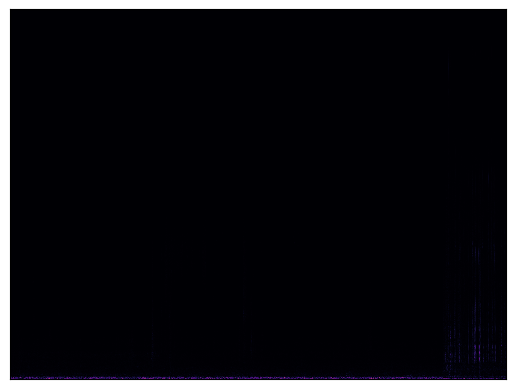

In [47]:
#음향 데이터 shape 확인
for i in range(5):
    audio_file, sample_rate = librosa.load(audio_df['file_path'][i], sr=44100)
    stft = librosa.stft(audio_file)  # STFT of y 스펙토그램으로 만들기
    S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    print("spectogram shape : ",S_db.shape)
    print(librosa.display.specshow(stft, sr=sample_rate))

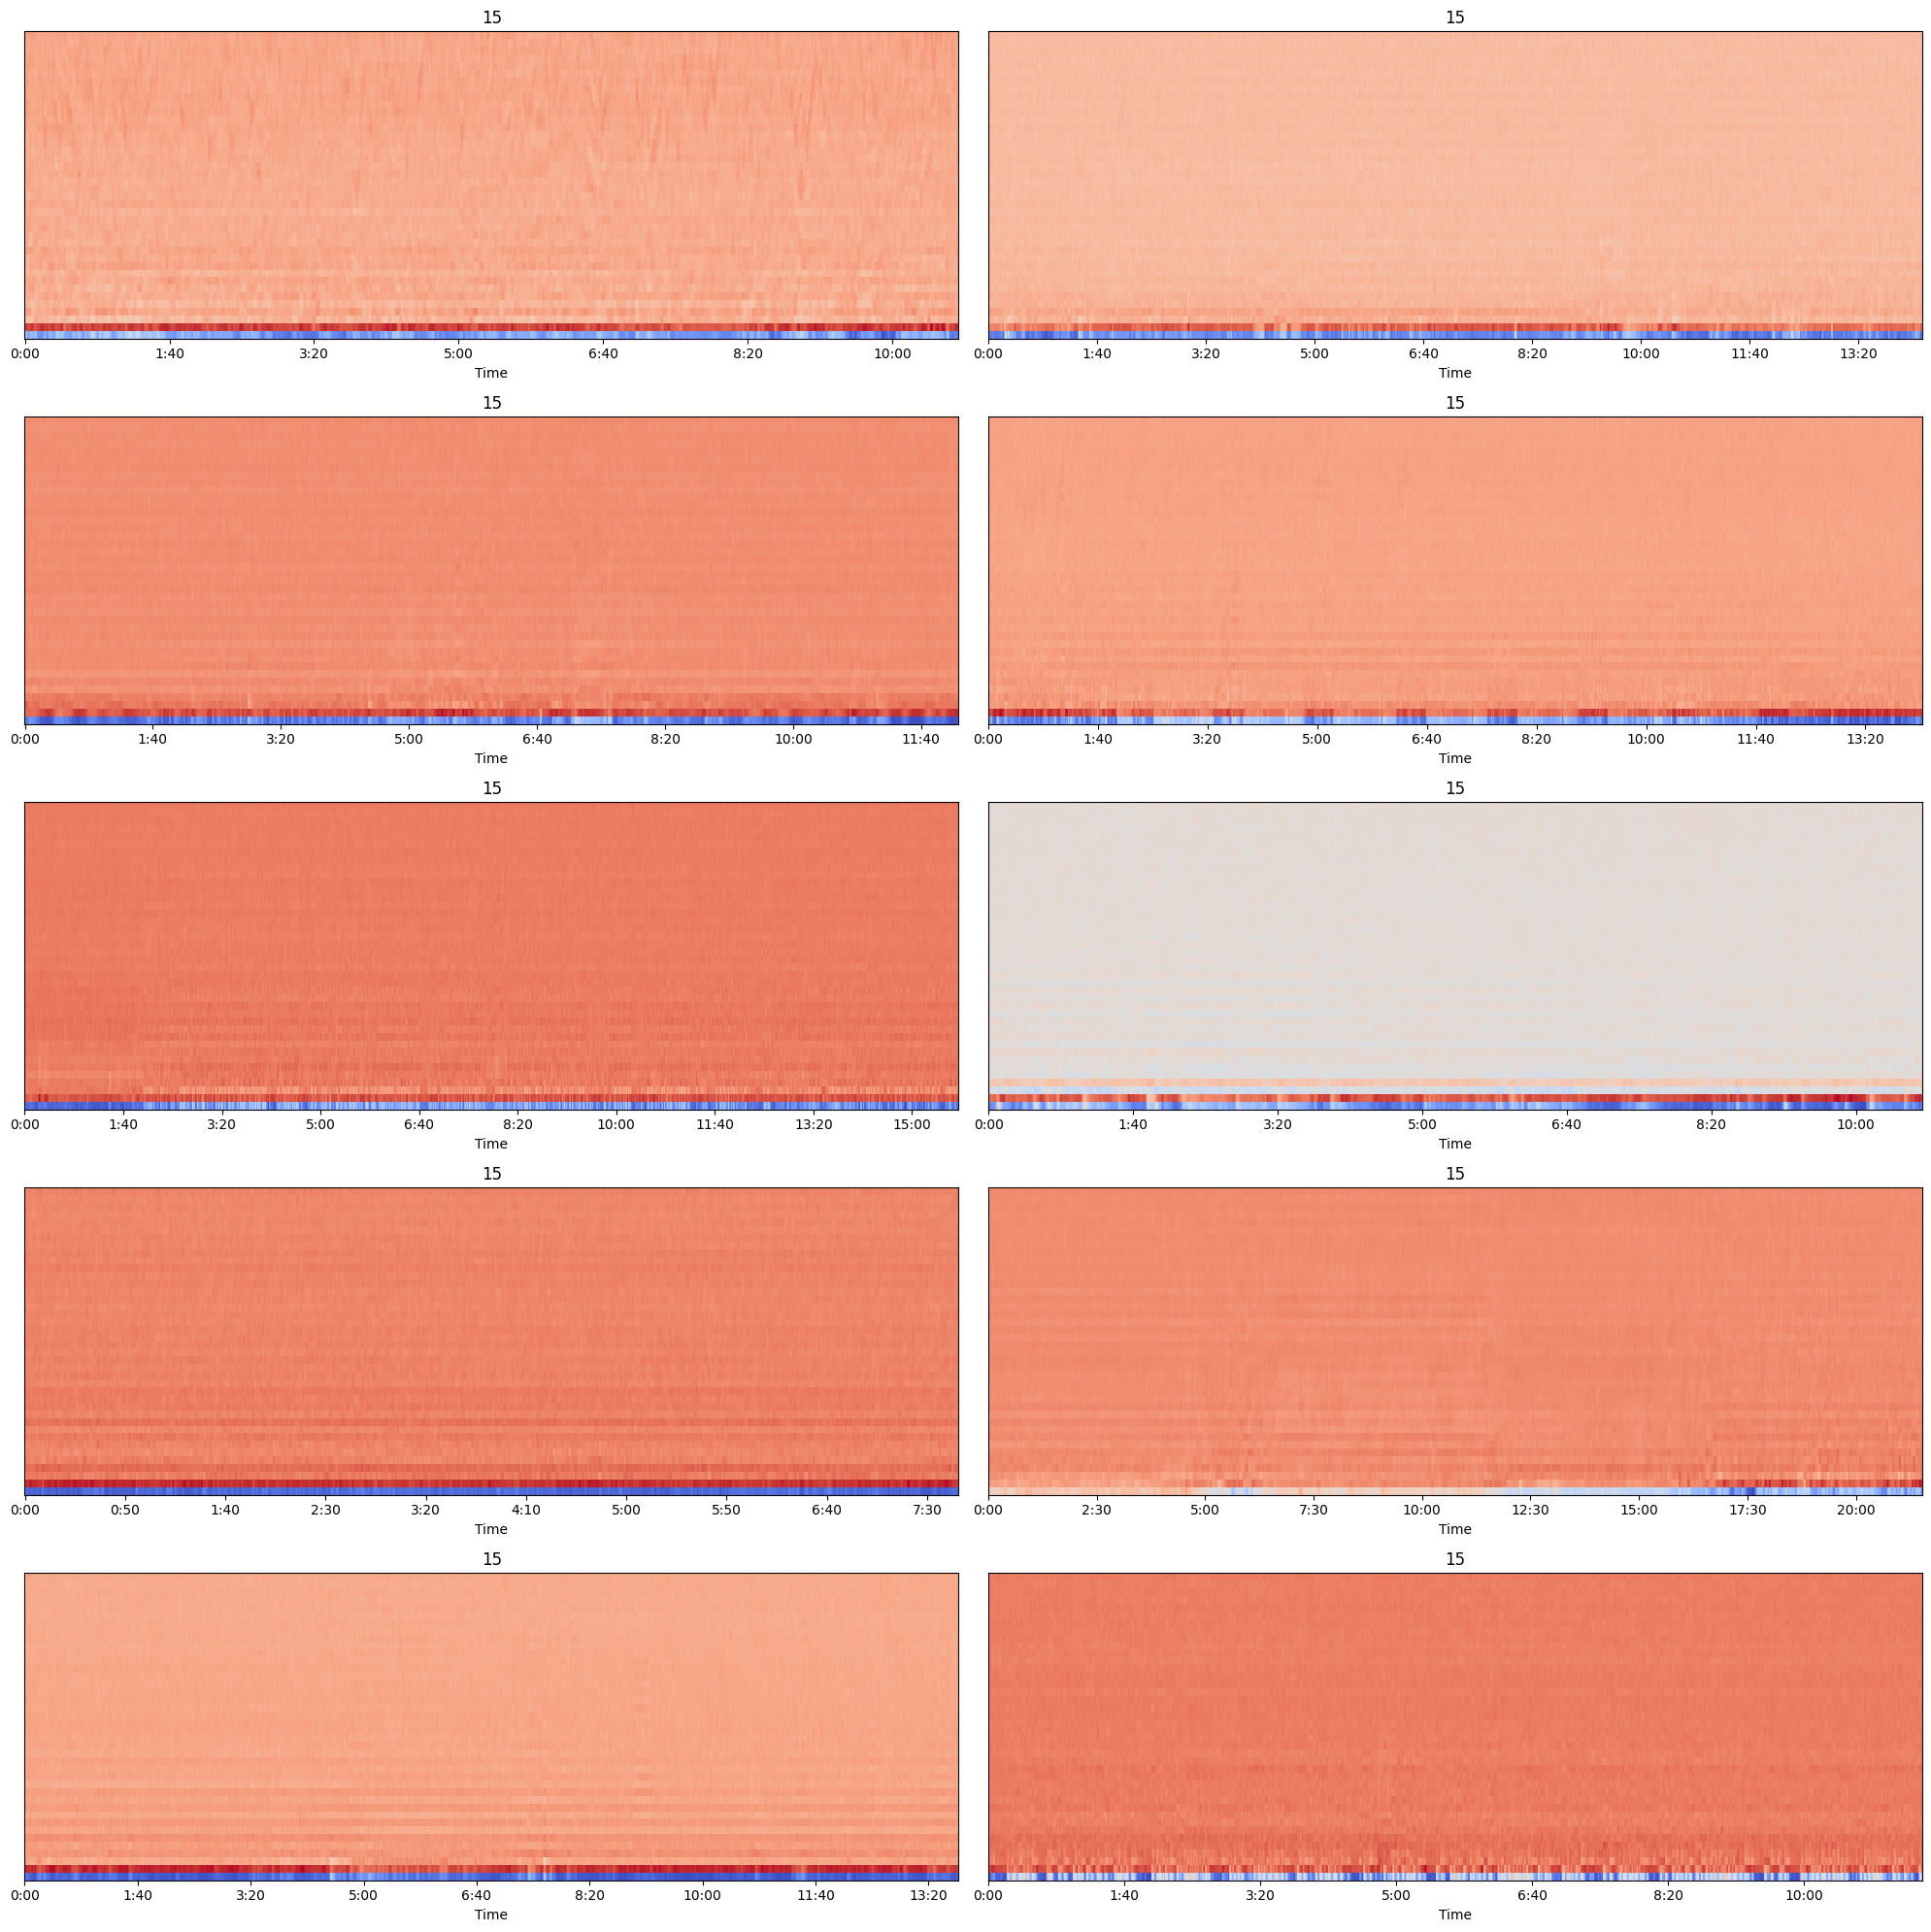

In [92]:
# Visualize 40 MFCCs
hop_length=1024
n_fft=2048
fig, axs = plt.subplots(5, 2, figsize=(20,20))
index = 0
n_s = 4
labels = audio_df['classID'].tolist()

for col in range(2):
    for row in range(5):
        audio_file, sample_rate = librosa.load(audio_df['file_path'][index])
        mfccs = librosa.feature.mfcc(y=audio_file,
                                    sr=sample_rate,
                                    n_fft=n_fft,
                                    n_mfcc=40)
        librosa.display.specshow(mfccs,
                             sr=n_fft,
                             hop_length=hop_length,
                             x_axis="time",
                             ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()


data length: 57110, sampling rate: 22050


<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4460 (\N{HANGUL JUNGSEONG OE}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 

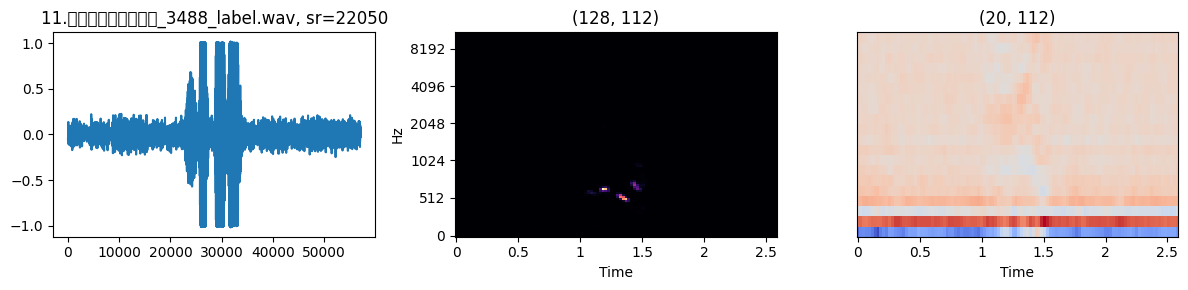

data length: 103613, sampling rate: 22050


<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4354 (\N{HANGUL CHOSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-24-d527059e1811>:20: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4354 (\N{HANGUL CHOSEONG NIEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


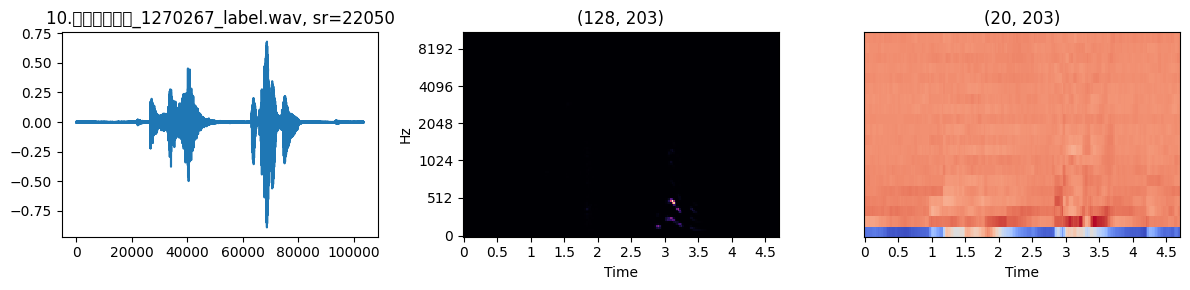

data length: 57110, sampling rate: 22050


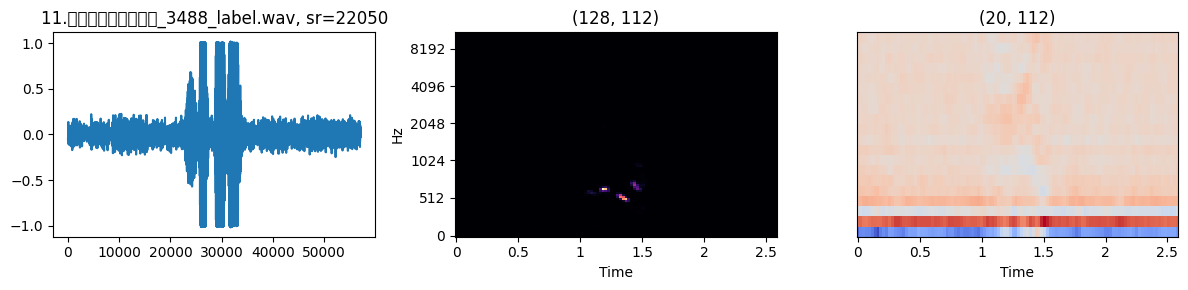

data length: 68576, sampling rate: 22050


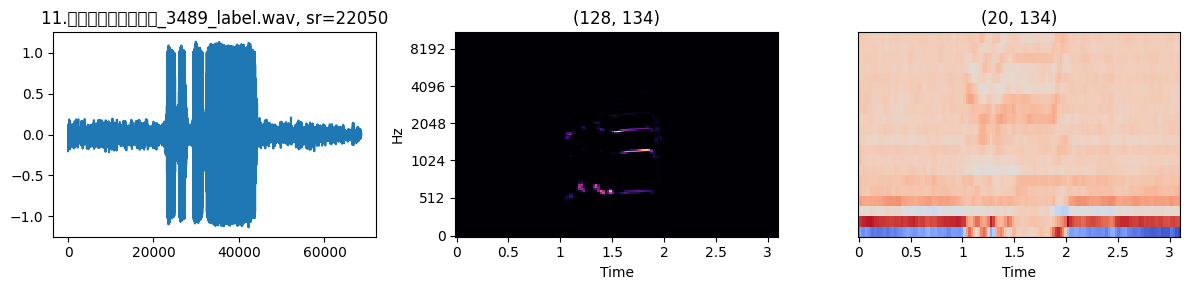

data length: 67253, sampling rate: 22050


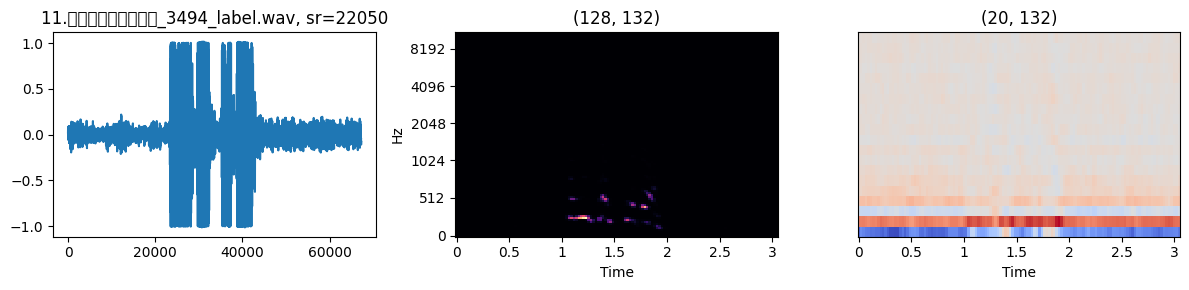

In [ ]:
#데이터 그래프로 확인(plot, mel, mfcc)
import IPython.display as ipd

def wav_info(file):
    data,sr = librosa.load(file)
    print(f"data length: {len(data)}, sampling rate: {sr}")
    ipd.display(ipd.Audio(data, rate=sr))

    fig,ax = plt.subplots(1,3,figsize=(12,3))
    ax[0].plot(data)
    ax[0].set_title(f"{file.split('/')[-1]}, sr={sr}")

    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set_title(f"{mel.shape}")

    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfcc, x_axis='time', ax=ax[2])
    ax[2].set_title(f"{mfcc.shape}")
    plt.tight_layout()
    plt.show()

num = np.random.randint(0,20,5)
for file in dataset_df['file_path'][num]:
    wav_info(file)

In [80]:
audio, sr = librosa.load(audio_df['file_path'][270], sr=44100, mono=True)
audio = librosa.util.fix_length(audio, size=5*sr)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40, hop_length=1024, n_fft=2048)

[[-3.2017444e+02 -3.4558023e+02 -3.4527438e+02 ... -7.0913092e+02
  -7.0913092e+02 -7.0913092e+02]
 [ 1.4684915e+02  1.9893619e+02  2.0303214e+02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 2.9697609e+01  1.0550459e+01  1.2919691e+01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 4.7243708e-01 -6.2584507e-01 -2.4468989e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 3.4225330e+00  2.0906398e+00 -1.0327675e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-5.5826777e-01  6.0763755e+00  6.4827979e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
(40, 216)


In [78]:
audio_df[audio_df.audio_length<5]

,classID,class,slice_file_name,file_path,audio_length
270,15,실내,15.실내_662791_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,3.873
574,15,실내,15.실내_658474_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,2.415
2865,1,강제추행(성범죄),1.강제추행(성범죄)_120201_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,2.100
2866,1,강제추행(성범죄),1.강제추행(성범죄)_143717_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,1.880
2867,1,강제추행(성범죄),1.강제추행(성범죄)_145847_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,2.410
...,...,...,...,...,...
50672,9,가스사고,9.가스사고_550768_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,1.260
50673,9,가스사고,9.가스사고_550310_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,1.160
50687,9,가스사고,9.가스사고_511506_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,3.180
50690,9,가스사고,9.가스사고_509888_label.wav,/content/drive/MyDrive/빅프/응급상황/Vali...,3.270


### frame 길이 맞추기(5초)

In [81]:
def extract_features(file_path): #audio_df[file_path]
    # 예시로 5초를 기준으로 설정하겠습니다.
    reference_length = 5  # 5초

    # 각 파일의 mfccs 특징을 처리하여 동일한 길이로 만듭니다.
    audio, sr = librosa.load(audio_df['file_path'][1], sr=44100, mono=True)
    audio = librosa.util.fix_length(audio, size=5*sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40, hop_length=1024, n_fft=2048)
    return mfccs

### 음성->feature

In [88]:
extract_features(audio_df['file_path'][0])

array([[-4.93540924e+02, -4.82482941e+02, -4.87362671e+02, ...,
        -5.15777161e+02, -4.81494232e+02, -4.58215546e+02],
       [ 7.94111786e+01,  8.50059357e+01,  1.09048569e+02, ...,
         1.31335190e+02,  1.17115685e+02,  9.11305771e+01],
       [ 5.24446058e+00, -9.70947838e+00, -2.89284248e+01, ...,
        -4.40122128e+00, -1.11357327e+01,  6.10237789e+00],
       ...,
       [ 2.10969135e-01, -4.00100183e+00, -8.70794678e+00, ...,
        -4.36781883e+00, -6.15992022e+00, -1.51935828e+00],
       [-6.66300595e-01,  6.17197037e-01,  3.11378121e+00, ...,
        -7.84099245e+00, -1.31059208e+01, -7.99174404e+00],
       [ 2.38564014e-02, -2.26485300e+00, -6.39638376e+00, ...,
         1.20680571e+00,  1.72298813e+00, -4.20530176e+00]], dtype=float32)

In [86]:
##데이터 feature df로 만들기
features = []
metadata = audio_df

# Iterate through each sound file and extract the features
for index, row in metadata.iterrows():
    file_name = row['file_path']
    class_label = row["classID"]
    data = extract_features(file_name)
    features.append([data, class_label])

# Convert into a Panda dataframe
features_df = pd.DataFrame(features, columns=['feature','class_label'])

In [87]:
features_df.tail()

,feature,class_label
50712,"[[-493.54092, -482.48294, -487.36267, -489.802...",9
50713,"[[-493.54092, -482.48294, -487.36267, -489.802...",9
50714,"[[-493.54092, -482.48294, -487.36267, -489.802...",9
50715,"[[-493.54092, -482.48294, -487.36267, -489.802...",9
50716,"[[-493.54092, -482.48294, -487.36267, -489.802...",9


In [6]:
# 피클로 데이터 저장
# features_df.to_pickle("/content/drive/MyDrive/KT_aivle/bigproject/features_df.pkl")

# 피클 데이터 로드
features_df = pd.read_pickle("/content/drive/MyDrive/KT_aivle/bigproject/features_df.pkl")

In [ ]:
'''
#aihub 데이터 참고
label = 16 # total label
height = 48 # Input image height
width = 173 # Input image width
SR = 44100 # [Hz] sampling rate
max_len = 4.0
max_len = int(max_len)
n_fft = 2048
n_hop = 1024
n_mfcc = 48
len_raw = int(SR * max_len)'''

### Training

*데이터 나눌때 keras.utils.audio로 해보기
참고 : https://www.tensorflow.org/api_docs/python/tf/keras/utils/audio_dataset_from_directory

In [11]:
#X=이미지 feature, Y=class
from keras.utils import to_categorical

X = np.array(features_df.feature.tolist())
y = np.array(features_df.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [32]:
print(X[23310], y[23310])

[[-4.93540924e+02 -4.82482941e+02 -4.87362671e+02 ... -5.15777161e+02
  -4.81494232e+02 -4.58215546e+02]
 [ 7.94111786e+01  8.50059357e+01  1.09048569e+02 ...  1.31335190e+02
   1.17115685e+02  9.11305771e+01]
 [ 5.24446058e+00 -9.70947838e+00 -2.89284248e+01 ... -4.40122128e+00
  -1.11357327e+01  6.10237789e+00]
 ...
 [ 2.10969135e-01 -4.00100183e+00 -8.70794678e+00 ... -4.36781883e+00
  -6.15992022e+00 -1.51935828e+00]
 [-6.66300595e-01  6.17197037e-01  3.11378121e+00 ... -7.84099245e+00
  -1.31059208e+01 -7.99174404e+00]
 [ 2.38564014e-02 -2.26485300e+00 -6.39638376e+00 ...  1.20680571e+00
   1.72298813e+00 -4.20530176e+00]] 8


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(40573, 40, 216) (10144, 40, 216) (40573, 14) (10144, 14)


In [13]:
n_columns = 216
n_row = 40
n_channels = 1
n_classes = 14
x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

In [ ]:
#aihub 변수
'''
label = 16 # total label
height = 48 # Input image height
width = 173 # Input image width
SR = 44100 # [Hz] sampling rate
max_len = 4.0
max_len = int(max_len)
n_fft = 2048
n_hop = 1024 # Librosa default is n_fft // 4이지만 aihub는 1024씀
n_mfcc = 48
len_raw = int(SR * max_len)
'''

### 1. CNN

In [21]:
model = keras.Sequential()

model.add(layers.Conv2D(input_shape=(n_row, n_columns, n_channels), filters=16, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(units=14, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 39, 215, 16)       80        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 107, 16)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 19, 107, 16)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 18, 106, 32)       2080      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 53, 32)        0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 9, 53, 32)        

In [22]:
training_epochs = 40
num_batch_size = 64

learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)

Epoch 1/40
634/634 [==============================] - 9s 11ms/step - loss: 2.6478 - accuracy: 0.1736
Epoch 2/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3787 - accuracy: 0.1850
Epoch 3/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3757 - accuracy: 0.1876
Epoch 4/40
634/634 [==============================] - 7s 10ms/step - loss: 2.3745 - accuracy: 0.1880
Epoch 5/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3732 - accuracy: 0.1883
Epoch 6/40
634/634 [==============================] - 7s 10ms/step - loss: 2.3731 - accuracy: 0.1889
Epoch 7/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3725 - accuracy: 0.1890
Epoch 8/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3715 - accuracy: 0.1891
Epoch 9/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3716 - accuracy: 0.1905
Epoch 10/40
634/634 [==============================] - 6s 10ms/step - loss: 2.3714 - accura

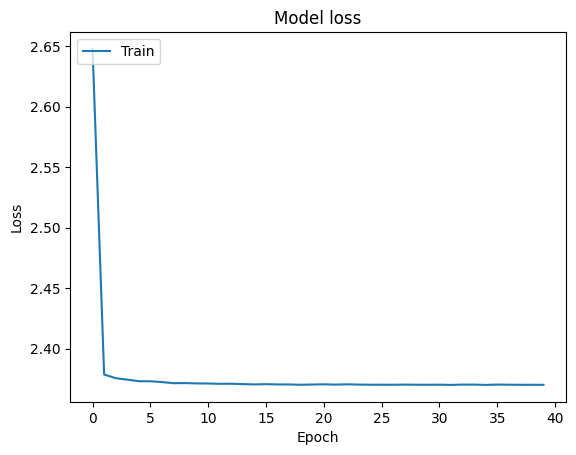

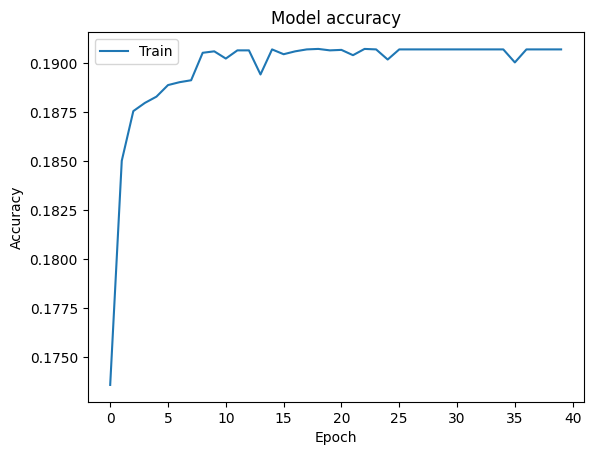

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [24]:
y_pred = model.predict(x_test)
y_pred.shape

317/317 [==============================] - 1s 2ms/step


(10144, 14)

In [44]:
y_pred[10000]

array([0.014993  , 0.02015573, 0.0672428 , 0.02081254, 0.05560991,
       0.0211277 , 0.06611723, 0.03938847, 0.08919051, 0.1158776 ,
       0.02710668, 0.18920425, 0.16537502, 0.10779861], dtype=float32)

In [43]:
y_pred_max_indices = np.argmax(y_pred, axis=1)
y_pred_one_hot = np.zeros_like(y_test)
rows = np.arange(y_pred_one_hot.shape[0])
y_pred_one_hot[rows, y_pred_max_indices] = 1

print(y_pred_one_hot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [45]:
from sklearn.metrics import classification_report

# y_true: 실제 레이블, y_pred: 예측된 레이블
report = classification_report(y_test, y_pred_one_hot)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.00      0.00      0.00       198
           2       0.00      0.00      0.00       733
           3       0.00      0.00      0.00       202
           4       0.00      0.00      0.00       587
           5       0.00      0.00      0.00       230
           6       0.00      0.00      0.00       715
           7       0.00      0.00      0.00       380
           8       0.00      0.00      0.00       930
           9       0.00      0.00      0.00      1086
          10       0.00      0.00      0.00       260
          11       0.19      1.00      0.31      1882
          12       0.00      0.00      0.00      1744
          13       0.00      0.00      0.00      1035

   micro avg       0.19      0.19      0.19     10144
   macro avg       0.01      0.07      0.02     10144
weighted avg       0.03      0.19      0.06     10144
 samples avg       0.19   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
